In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('../data/diabetes.csv')
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
# cleaning data - check for missing values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [3]:
print('The data set has ' + str(len(df)) + ' rows')
print('The data set has ' + str(len(df.columns)) + ' columns')

The data set has 253680 rows
The data set has 22 columns


In [4]:
# no missing values!!
# Summary of each variable of interest:

# Target variable: Diabetes_012
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [5]:
# Smoker
df['Smoker'].value_counts()

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

In [6]:
# PhysActivity
df['PhysActivity'].value_counts()

PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

In [7]:
# Fruits
df['Fruits'].value_counts()

Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64

In [8]:
# Veggies
df['Veggies'].value_counts()

Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64

In [9]:
# HvyAlcoholConsump
df['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

In [10]:
# Education
df['Education'].value_counts()
# df['Education'].describe()

Education
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: count, dtype: int64

In [11]:
# Income
df['Income'].value_counts()
# df['Income'].describe()

Income
8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: count, dtype: int64

In [12]:
# AnyHealthcare
df['AnyHealthcare'].value_counts()

AnyHealthcare
1.0    241263
0.0     12417
Name: count, dtype: int64

In [13]:
# Sex
df['Sex'].value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [14]:
# Age
df['Age'].value_counts()
# df['Age'].describe()

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64

In [15]:
# BMI
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

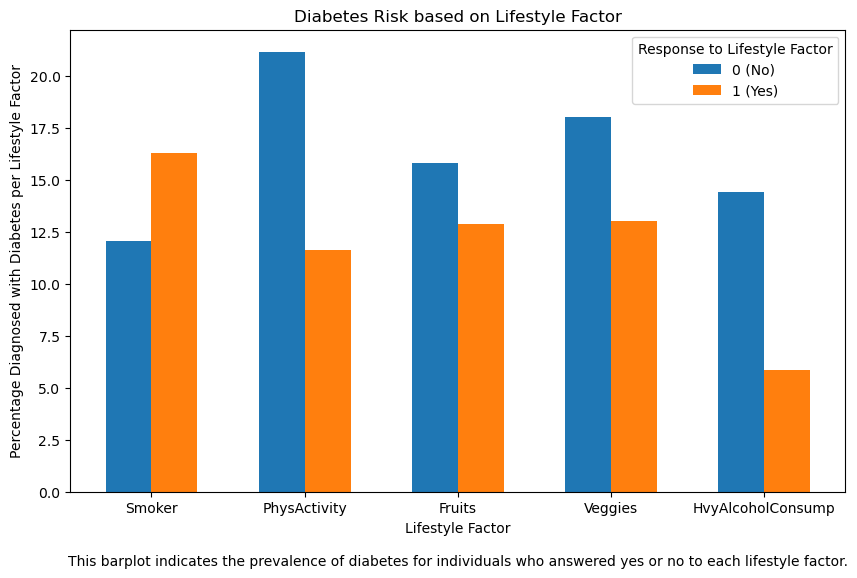

In [16]:
# moving onto RQ1: What lifestyle factors (physical activity, smoking, drinking, etc.) have the biggest influence in developing diabetes?
# ok figure this out tmrw???
factors = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# 1. calculate percentage of each group (nos and yes) that has been diagnosed with diabetes
percent_no = []
percent_yes = []

for factor in factors:
    no_group = df[df[factor] == 0]
    yes_group = df[df[factor] == 1]

    percentage_no = (no_group['Diabetes_012'] == 2).mean() * 100
    percentage_yes = (yes_group['Diabetes_012'] == 2).mean() * 100

    percent_no.append(percentage_no)
    percent_yes.append(percentage_yes)

# Step 2: Plot
x = np.arange(len(factors))
width = 0.3

plt.figure(figsize=(10, 6))

# gives us two bars per feature (learned this from geeks for geeks)
plt.bar(x - width/2, percent_no, width, label='0 (No)')
plt.bar(x + width/2, percent_yes, width, label='1 (Yes)')

plt.title('Diabetes Risk based on Lifestyle Factor')
plt.xlabel('Lifestyle Factor')
plt.ylabel('Percentage Diagnosed with Diabetes per Lifestyle Factor')
plt.xticks(x, factors)
plt.legend(title='Response to Lifestyle Factor')
plt.text(0.5, -0.15, "This barplot indicates the prevalence of diabetes for individuals who answered yes or no to each lifestyle factor.", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [17]:
# challenge tasks 1: ML
df['Diabetes_Binary'] = df['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)
X = df[factors]
y = df['Diabetes_Binary']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# use random state and stratify to make sure we 1. get the same results everytime, 2. make sure that not all of one type
# is funneled into the training set and vice versa --> i.e maintains consistency (can prob get rid of random state?
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y)

# Create and fit the model - need to balance it because too much of our data set is healthy individuals (therefor not predicting
# diabetic individuals)
logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)

# Predictions and basic evaluation - coefficients + odds ratio
y_pred = logreg_model.predict(X_test)

# use this to show how our model classfies
# print(classification_report(y_test, y_pred, zero_division=0))

# checking coefficients of our logreg model
# coefficient > 0 increase odds of being diabetic
# odds ratio > 1: high risk
# odds ratio < 1: lower risk (factor is a protective one?)
# = 1: no effect
coefficients = pd.DataFrame({
    'Factor': X.columns,
    # gets actual coef of factors
    'Coefficient': logreg_model.coef_[0],
    # finds odds ratio based on coef by doing np.exp on the coef of each feature (converts it into an
    # interpretable percentage (either over 1 or less than 1, meaning the feature is more likely to affect or decrease effect)
    'Odds Ratio': np.exp(logreg_model.coef_[0])
})

print(coefficients.sort_values(by='Odds Ratio', ascending=False))

              Factor  Coefficient  Odds Ratio
0             Smoker     0.348204    1.416521
2             Fruits    -0.113360    0.892830
3            Veggies    -0.240539    0.786204
1       PhysActivity    -0.635194    0.529833
4  HvyAlcoholConsump    -1.113169    0.328516


In [18]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)

rf_ypreds = rf_model.predict(X_test)
# print(classification_report(y_test, rf_ypreds, zero_division=0))

factor_importance = rf_model.feature_importances_
importances = pd.DataFrame({
    'Factor': X.columns,
    'Importance': factor_importance
})

print(importances.sort_values(by='Importance', ascending=False))

              Factor  Importance
1       PhysActivity    0.504688
4  HvyAlcoholConsump    0.204926
0             Smoker    0.164031
3            Veggies    0.081634
2             Fruits    0.044721


In [19]:
# result validity: chi square
import scipy.stats as stats

for factor in factors:
    contingency_table = pd.crosstab(df[factor], df['Diabetes_Binary'])
    chi_squared, p_val, _, expected = stats.chi2_contingency(contingency_table)
    print(factor)
    print('Chi-squared value: ' + str(chi_squared))
    print('p-value: ' + str(p_val))
    print('expected values: ' + str(expected))
    print()

# null: these variables are independent 
# alternate: these variables are dependent
# p < 0.05: statistical significant evidence

Smoker
Chi-squared value: 937.0557592033365
p-value: 8.640171809942514e-206
expected values: [[121575.23587985  19681.76412015]
 [ 96758.76412015  15664.23587985]]

PhysActivity
Chi-squared value: 3539.4193699366724
p-value: 0.0
expected values: [[ 53154.79280984   8605.20719016]
 [165179.20719016  26740.79280984]]

Fruits
Chi-squared value: 421.61153890191144
p-value: 1.0881213885155634e-93
expected values: [[ 79854.40392621  12927.59607379]
 [138479.59607379  22418.40392621]]

Veggies
Chi-squared value: 811.8059748359335
p-value: 1.4630291539062376e-178
expected values: [[ 41173.44775307   6665.55224693]
 [177160.55224693  28680.44775307]]

HvyAlcoholConsump
Chi-squared value: 825.1187559262196
p-value: 1.8659318101056404e-181
expected values: [[206064.33150426  33359.66849574]
 [ 12269.66849574   1986.33150426]]



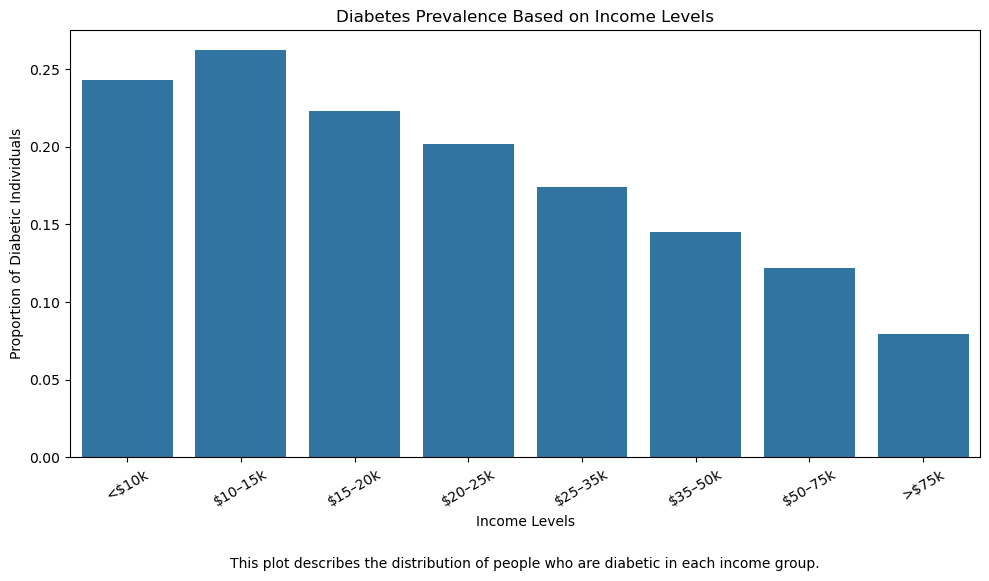

In [20]:
#  rq2: Do socioeconomic factors correlate to an increased risk of developing diabetes?

# Income
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Income', y='Diabetes_Binary', errorbar=None)
plt.title('Diabetes Prevalence Based on Income Levels')
plt.xlabel('Income Levels')
plt.ylabel('Proportion of Diabetic Individuals')
plt.xticks(ticks=range(8),
           labels=['<$10k', '$10–15k', '$15–20k', '$20–25k',
                   '$25–35k', '$35–50k', '$50–75k', '>$75k'],
           rotation=30
)
plt.text(0.5, -0.25, "This plot describes the distribution of people who are diabetic in each income group.", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

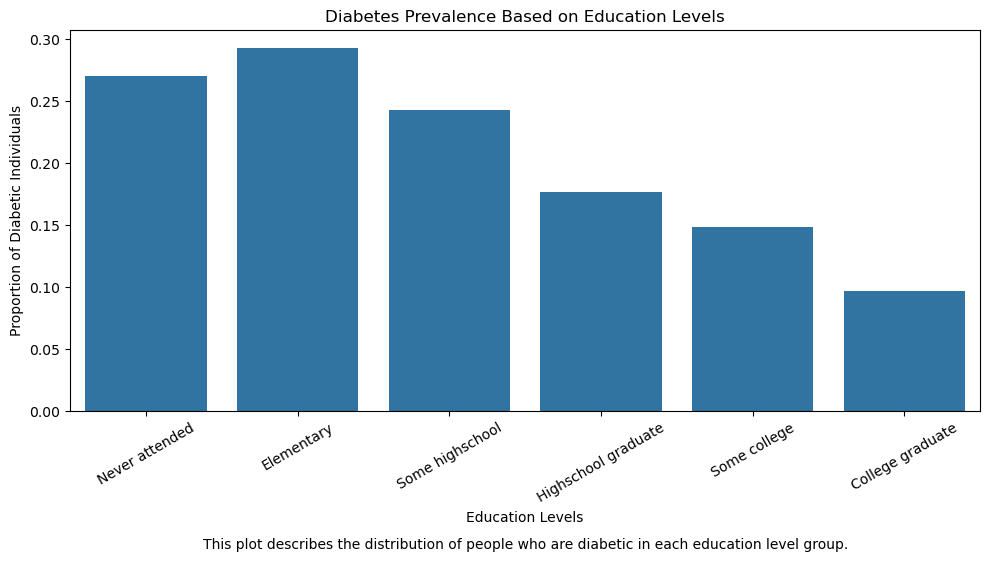

In [21]:
# Education
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Education', y='Diabetes_Binary', errorbar=None)
plt.title('Diabetes Prevalence Based on Education Levels')
plt.xlabel('Education Levels')
plt.ylabel('Proportion of Diabetic Individuals')
plt.xticks(ticks=range(6),
           labels=['Never attended', 'Elementary', 'Some highschool',
                   'Highschool graduate', 'Some college',
                   'College graduate'],
           rotation=30
)
plt.text(0.5, -0.35, "This plot describes the distribution of people who are diabetic in each education level group.", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

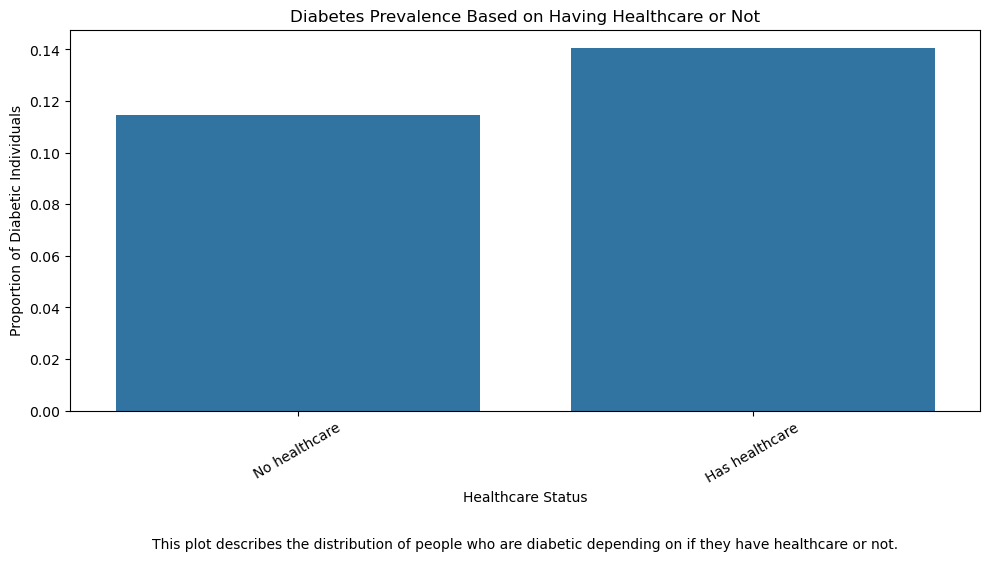

In [22]:
# AnyHealthcare
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='AnyHealthcare', y='Diabetes_Binary', errorbar=None)
plt.title('Diabetes Prevalence Based on Having Healthcare or Not')
plt.xlabel('Healthcare Status')
plt.ylabel('Proportion of Diabetic Individuals')
plt.xticks(ticks=range(2),
           labels=['No healthcare', 'Has healthcare'],
           rotation=30
)
plt.text(0.5, -0.35, "This plot describes the distribution of people who are diabetic depending on if they have healthcare or not.", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [23]:
# challenge task: ML
X_rq2 = df[['Income', 'Education', 'AnyHealthcare']]
y_rq2 = df['Diabetes_Binary']

# use random state and stratify to make sure we 1. get the same results everytime, 2. make sure that not all of one type
# is funneled into the training set and vice versa --> i.e maintains consistency
X_rq2_train, X_rq2_test, y_rq2_train, y_rq2_test = train_test_split(
    X_rq2, y_rq2, test_size=0.3, stratify=y_rq2)

# Create and fit the model - need to balance it because too much of our data set is healthy individuals (therefor not predicting
# diabetic individuals)
logreg_model_rq2 = LogisticRegression(class_weight='balanced')
logreg_model_rq2.fit(X_rq2_train, y_rq2_train)

# Predictions and basic evaluation - coefficients + odds ratio
y_rq2_pred = logreg_model_rq2.predict(X_rq2_test)

# use this to show how our model classfies
# print(classification_report(y_rq2_test, y_rq2_pred, zero_division=0))

# checking coefficients of our logreg model
# coefficient > 0 increase odds of being diabetic
# odds ratio > 1: high risk
# odds ratio < 1: lower risk (factor is a protective one?)
# = 1: no effect
coefficients_rq2 = pd.DataFrame({
    'Factor': X_rq2.columns,
    # gets actual coef of factors
    'Coefficient': logreg_model_rq2.coef_[0],
    # finds odds ratio based on coef by doing np.exp on the coef of each feature (converts it into an
    # interpretable percentage (either over 1 or less than 1, meaning the feature is more likely to affect or decrease effect)
    'Odds Ratio': np.exp(logreg_model_rq2.coef_[0])
})

print(coefficients_rq2.sort_values(by='Odds Ratio', ascending=False))

          Factor  Coefficient  Odds Ratio
2  AnyHealthcare     0.592211    1.807981
1      Education    -0.177800    0.837110
0         Income    -0.188467    0.828228


In [24]:
# random forest:
rf_model_rq2 = RandomForestClassifier(class_weight='balanced')
rf_model_rq2.fit(X_rq2_train, y_rq2_train)

rf_ypreds_rq2 = rf_model_rq2.predict(X_rq2_test)
# print(classification_report(y_rq2_test, rf_ypreds_rq2, zero_division=0))

factor_importance_rq2 = rf_model_rq2.feature_importances_
importances_rq2 = pd.DataFrame({
    'Factor': X_rq2.columns,
    'Importance': factor_importance_rq2
})

print(importances_rq2.sort_values(by='Importance', ascending=False))

          Factor  Importance
0         Income    0.707102
1      Education    0.262647
2  AnyHealthcare    0.030251


In [25]:
# challenge task: result validity

# chi-squared test on anyhealthcare bc it's a categorical variable
contingency_table_rq2 = pd.crosstab(df['AnyHealthcare'], df['Diabetes_Binary'])
chi_squared_rq2, p_val_rq2, _, expected = stats.chi2_contingency(contingency_table_rq2)
print()
print('Chi-squared value: ' + str(chi_squared_rq2))
print('p-value: ' + str(p_val_rq2))
print(expected)

#  null is always independent
# use pval of 0.05


Chi-squared value: 66.81237194302645
p-value: 2.986181073970451e-16
[[ 10686.9019158   1730.0980842]
 [207647.0980842  33615.9019158]]


In [26]:
# result validity continued:
# on income and education -> correlation test
# use spearmanr because good for qualitative ordinal values with quantitative variable

from scipy.stats import spearmanr

socio_factors_ord = ['Income', 'Education']
for factor in socio_factors_ord:
    correlation_rq2, _ = spearmanr(df[factor], df['Diabetes_Binary'])
    print(factor)                  
    print('Correlation: ' + str(correlation_rq2))
    print()

Income
Correlation: -0.16330469335765088

Education
Correlation: -0.12003773605832628



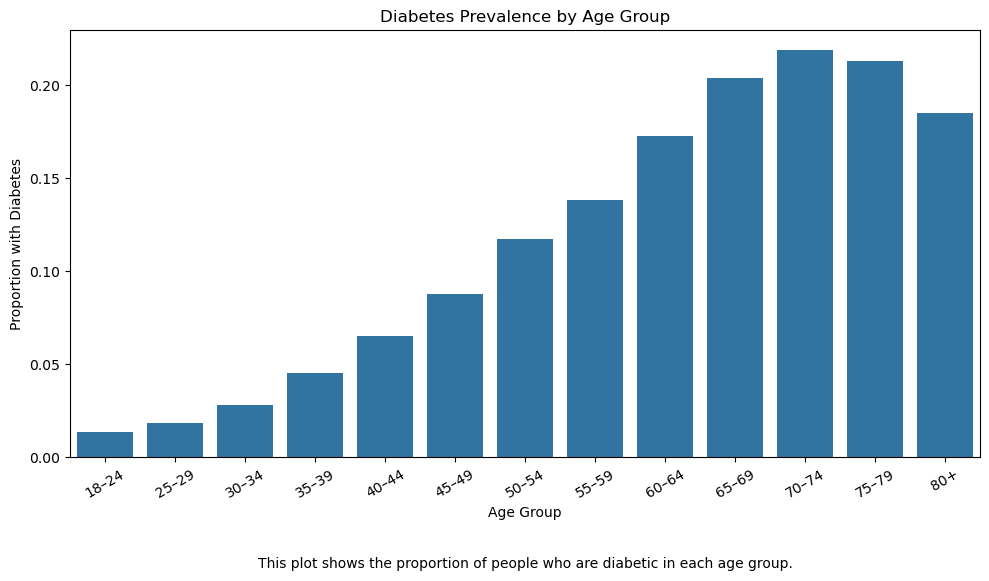

In [27]:
# rq3: Are there any demographic factors that are associated with the likelihood of being diagnosed with diabetes?

# Age
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age', y='Diabetes_Binary', errorbar=None)

plt.title('Diabetes Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Diabetes')

plt.xticks(ticks=range(13),
           labels=['18–24', '25–29', '30–34', '35–39', '40–44', '45–49',
                   '50–54', '55–59', '60–64', '65–69', '70–74', '75–79', '80+'],
           rotation=30)

plt.text(0.5, -0.25, "This plot shows the proportion of people who are diabetic in each age group.", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

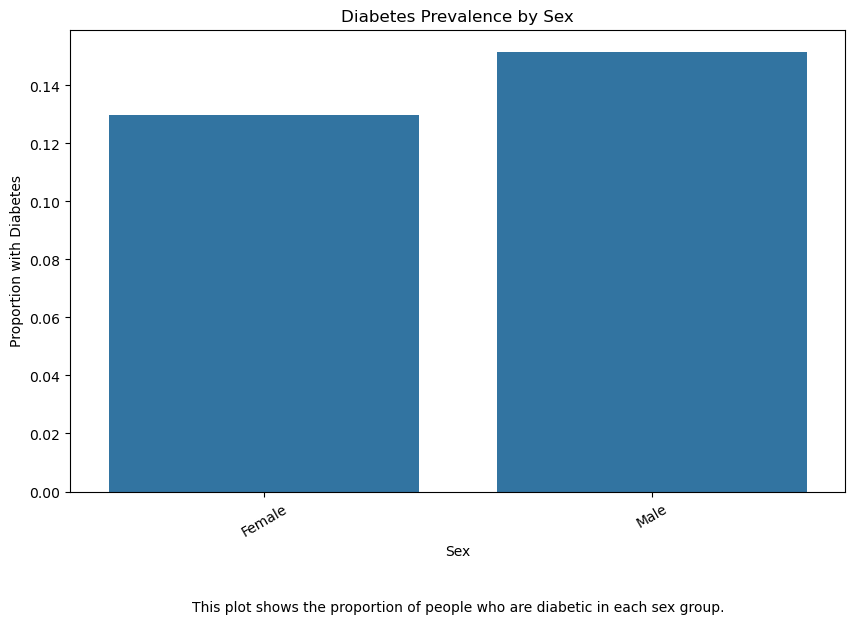

In [28]:
# Sex
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sex', y='Diabetes_Binary', errorbar=None)
plt.title('Diabetes Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion with Diabetes')
plt.xticks(ticks=range(2),
           labels=['Female', 'Male'],
           rotation=30
)
plt.text(0.5, -0.25, "This plot shows the proportion of people who are diabetic in each sex group.", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

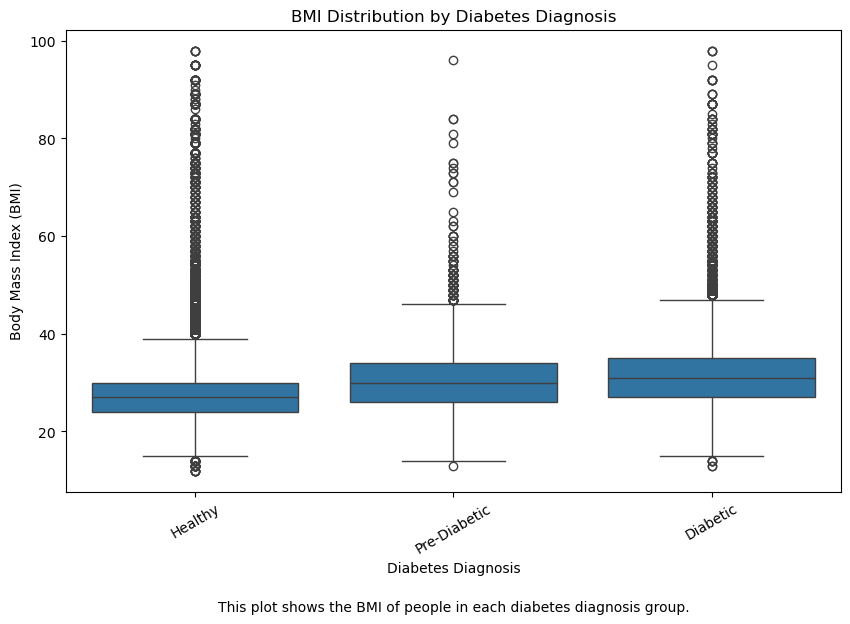

In [29]:
# BMI
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Diabetes_012', y='BMI')
plt.title('BMI Distribution by Diabetes Diagnosis')
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Body Mass Index (BMI)')
plt.xticks(ticks=range(3),
           labels=['Healthy', 'Pre-Diabetic', 'Diabetic'],
           rotation=30
)
plt.text(0.5, -0.25, "This plot shows the BMI of people in each diabetes diagnosis group.", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [30]:
# challenge task: ML
X_rq3 = df[['Age', 'Sex', 'BMI']]
y_rq3 = df['Diabetes_Binary']

# use random state and stratify to make sure we 1. get the same results everytime, 2. make sure that not all of one type
# is funneled into the training set and vice versa --> i.e maintains consistency
X_rq3_train, X_rq3_test, y_rq3_train, y_rq3_test = train_test_split(
    X_rq3, y_rq3, test_size=0.3, stratify=y)

# Create and fit the model - need to balance it because too much of our data set is healthy individuals (therefor not predicting
# diabetic individuals)
logreg_model_rq3 = LogisticRegression(class_weight='balanced')
logreg_model_rq3.fit(X_rq3_train, y_rq3_train)

# Predictions and basic evaluation - coefficients + odds ratio
y_rq3_pred = logreg_model_rq3.predict(X_rq3_test)

# use this to show how our model classfies
# print(classification_report(y_rq3_test, y_rq3_pred, zero_division=0))

# checking coefficients of our logreg model
# coefficient > 0 increase odds of being diabetic
# odds ratio > 1: high risk
# odds ratio < 1: lower risk (factor is a protective one?)
# = 1: no effect
coefficients_rq3 = pd.DataFrame({
    'Factor': X_rq3.columns,
    # gets actual coef of factors
    'Coefficient': logreg_model_rq3.coef_[0],
    # finds odds ratio based on coef by doing np.exp on the coef of each feature (converts it into an
    # interpretable percentage (either over 1 or less than 1, meaning the feature is more likely to affect or decrease effect)
    'Odds Ratio': np.exp(logreg_model_rq3.coef_[0])
})

print(coefficients_rq3.sort_values(by='Odds Ratio', ascending=False))


  Factor  Coefficient  Odds Ratio
0    Age     0.247652    1.281014
1    Sex     0.214824    1.239644
2    BMI     0.114100    1.120864


In [31]:
# random forest

rf_model_rq3 = RandomForestClassifier(class_weight='balanced')
rf_model_rq3.fit(X_rq3_train, y_rq3_train)

rf_ypreds_rq3 = rf_model_rq3.predict(X_rq3_test)
# print(classification_report(y_rq3_test, rf_ypreds_rq3, zero_division=0))

factor_importance_rq3 = rf_model_rq3.feature_importances_
importances_rq3 = pd.DataFrame({
    'Factor': X_rq3.columns,
    'Importance': factor_importance_rq3
})

print(importances_rq3.sort_values(by='Importance', ascending=False))

  Factor  Importance
2    BMI    0.564861
0    Age    0.422402
1    Sex    0.012737


In [32]:
# result validity

correlation_rq3, _ = spearmanr(df['Age'], df['Diabetes_Binary'])
print('Age')                  
print('Correlation: ' + str(correlation_rq3))
print()

Age
Correlation: 0.17768426329341758



In [33]:
# t-test for BMI

import scipy.stats as stats

bmi_no_diabetes = df[df['Diabetes_Binary'] == 0]['BMI']
bmi_diabetes = df[df['Diabetes_Binary'] == 1]['BMI']

t_stat, p_val_bmi = stats.ttest_ind(bmi_no_diabetes, bmi_diabetes, equal_var=False)
print('T-test statistic: ' + str(t_stat))
print('p-value: ' + str(p_val_bmi))

T-test statistic: -99.91962872964875
p-value: 0.0


In [34]:
# t-test for sex
sex_no_diabetes = df[df['Diabetes_Binary'] == 0]['Sex']
sex_diabetes = df[df['Diabetes_Binary'] == 1]['Sex']

t_stat_sex, p_val_sex = stats.ttest_ind(sex_no_diabetes, sex_diabetes, equal_var=False)
print('T-test statistic: ' + str(t_stat_sex))
print('p-value: ' + str(p_val_sex))

T-test statistic: -15.74788309676068
p-value: 9.84358941137104e-56
